In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from torch import optim, nn
from collections import OrderedDict


In [2]:
class Harmon_Neural_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.lin = nn.Linear(4,16)
        self.l1 = nn.Linear(16,13)
        self.l2 = nn.Linear(13,9)
        self.l3 = nn.Linear(9,4)
        self.lout = nn.Linear(4,1)
        
    def forward(self, x):
        out = torch.tanh(self.lin(x))
        out = torch.tanh(self.l1(out))
        out = torch.tanh(self.l2(out))
        out = torch.tanh(self.l3(out))
        return self.lout(out)
    

In [3]:
#load the model
filename = "Harmon_Final_model.pt"
loaded_model = Harmon_Neural_Net()
loaded_model.load_state_dict(torch.load("./"+filename))
loaded_model


Harmon_Neural_Net(
  (lin): Linear(in_features=4, out_features=16, bias=True)
  (l1): Linear(in_features=16, out_features=13, bias=True)
  (l2): Linear(in_features=13, out_features=9, bias=True)
  (l3): Linear(in_features=9, out_features=4, bias=True)
  (lout): Linear(in_features=4, out_features=1, bias=True)
)

In [50]:
#read the dataset
input_dataset = pd.read_csv("./cleaned_dataset.csv")
input_dataset.pop('Country')
y = torch.from_numpy(input_dataset.pop('GDP Growth').values).type(torch.float)
x = torch.from_numpy(input_dataset.values).type(torch.float)
pd.read_csv("./cleaned_dataset.csv")


,Mobile,Country,Upload,Download,Latency,GDP Growth
0,0.0,Afghanistan,428.0,356.0,-20.0,-1.934778
1,0.0,Albania,5327.0,7265.0,-6.0,-3.311239
2,0.0,Algeria,-133.0,1447.0,-15.0,-5.480992
3,0.0,Andorra,55214.0,57985.0,3.0,-11.956058
4,0.0,Angola,439.0,-742.0,15.0,-4.040510
...,...,...,...,...,...,...
1215,1.0,United Kingdom,-3234.0,-27993.0,-1.0,-9.790240
1216,1.0,United States,-3934.0,-16948.0,8.0,-3.486140
1217,1.0,Uruguay,-2676.0,-11680.0,-4.0,-5.858721
1218,1.0,Uzbekistan,3270.0,17540.0,-12.0,1.647797


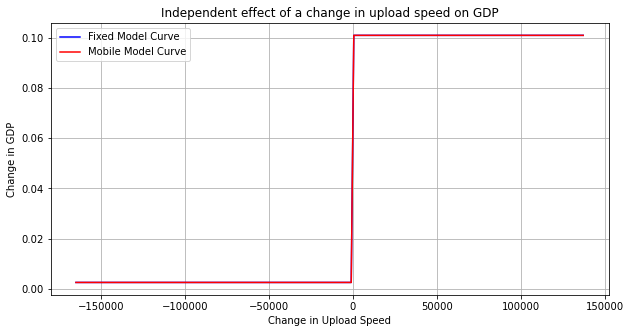

In [57]:
x_lin = torch.zeros((200,4))
upmax = max(x[:,1])
upmin = min(x[:,1])
x_lin[:,1] = torch.from_numpy(np.arange( upmin, upmax, (upmax - upmin) / 200 ))
y_lin = loaded_model(x_lin)
x_lin_mobile = x_lin.clone()
x_lin_mobile[:,0] = torch.ones((200))
y_lin_mobile = loaded_model(x_lin_mobile)

plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Change in Upload Speed')
plt.ylabel('Change in GDP')
plt.title('Independent effect of a change in upload speed on GDP')
plt.plot(x_lin[:,1].detach(), y_lin.detach(), color='blue', label='Fixed Model Curve')
plt.plot(x_lin_mobile[:,1].detach(), y_lin_mobile.detach(), color='red', label='Mobile Model Curve')
plt.legend()
plt.show()


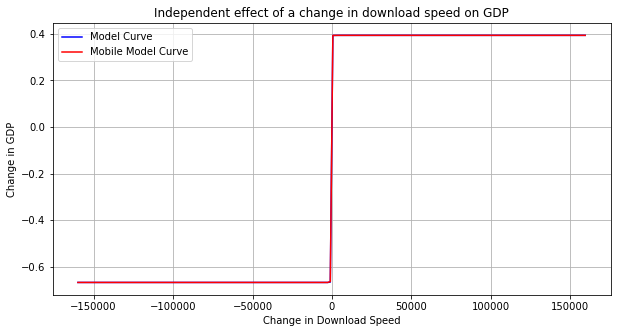

In [59]:
x_lin = torch.zeros((200,4))
upmax = max(x[:,2])
upmin = min(x[:,2])
x_lin[:,2] = torch.from_numpy(np.arange( upmin, upmax, (upmax - upmin) / 200 ))
y_lin = loaded_model(x_lin)
x_lin_mobile = x_lin.clone()
x_lin_mobile[:,0] = torch.ones((200))
y_lin_mobile = loaded_model(x_lin_mobile)

plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Change in Download Speed')
plt.ylabel('Change in GDP')
plt.title('Independent effect of a change in download speed on GDP')
plt.plot(x_lin[:,2].detach(), y_lin.detach(), color='blue', label='Model Curve')
plt.plot(x_lin_mobile[:,2].detach(), y_lin_mobile.detach(), color='red', label='Mobile Model Curve')
plt.legend()
plt.show()


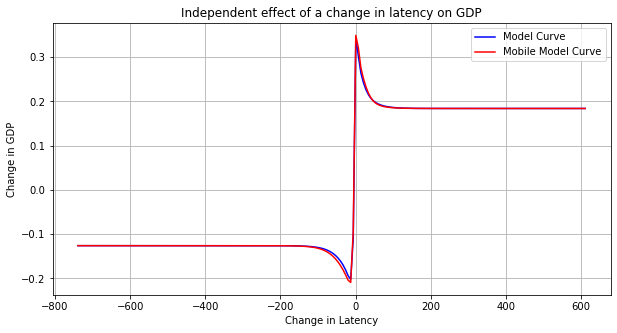

In [61]:
x_lin = torch.zeros((200,4))
upmax = max(x[:,3])
upmin = min(x[:,3])
x_lin[:,3] = torch.from_numpy(np.arange( upmin, upmax, (upmax - upmin) / 200 ))
y_lin = loaded_model(x_lin)
x_lin_mobile = x_lin.clone()
x_lin_mobile[:,0] = torch.ones((200))
y_lin_mobile = loaded_model(x_lin_mobile)

plt.rcParams["figure.figsize"] = (10,5)
plt.grid()
plt.xlabel('Change in Latency')
plt.ylabel('Change in GDP')
plt.title('Independent effect of a change in latency on GDP')
plt.plot(x_lin[:,3].detach(), y_lin.detach(), color='blue', label='Model Curve')
plt.plot(x_lin_mobile[:,3].detach(), y_lin_mobile.detach(), color='red', label='Mobile Model Curve')
plt.legend()
plt.show()
